# pandasowa ramka danych

In [3]:
data = {
    0: {"wzrost": 180,
        "waga": 78},
    1: {"wzrost": 160,
        "waga": 120},
    2: {"wzrost": 175,
        "waga": 65},
    3: {"wzrost": 65,
        "waga": 3}
}
data

{0: {'wzrost': 180, 'waga': 78},
 1: {'wzrost': 160, 'waga': 120},
 2: {'wzrost': 175, 'waga': 65},
 3: {'wzrost': 65, 'waga': 3}}

In [4]:
import pandas as pd

In [5]:
data_df = pd.DataFrame.from_dict(data, orient='index')
data_df

,wzrost,waga
0,180,78
1,160,120
2,175,65
3,65,3


In [6]:
data_v = data_df.reset_index().to_dict(orient='list')
data_v

{'index': [0, 1, 2, 3],
 'wzrost': [180, 160, 175, 65],
 'waga': [78, 120, 65, 3]}

# Pythonowa lista kontra wektor NumPy

In [7]:
v = [1]
v

[1]

In [8]:
v * 10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
import numpy as np

In [10]:
v = np.array([1])
v

array([1])

In [11]:
v * 10

array([10])

# Szybkość "czystego" Pythona kontra NumPy

In [12]:
%%time

v = [1] * 10000000

sum_of_v = 0
for el in v:
    sum_of_v += el

sum_of_v

CPU times: user 634 ms, sys: 14.9 ms, total: 649 ms
Wall time: 648 ms


10000000

In [13]:
%%time

v_np = np.ones(10000000)

sum_of_v_np = np.sum(v_np)

sum_of_v_np

CPU times: user 6.93 ms, sys: 17.6 ms, total: 24.6 ms
Wall time: 23.5 ms


10000000.0

In [14]:
!python --version

Python 3.6.8


# Przydatne polecenia w NumPy

$\begin{bmatrix}1 & 2 & 3 & 4\end{bmatrix}\cdot\begin{bmatrix}5 \\ 6 \\ 7 \\ 8\end{bmatrix}$

In [15]:
A = [1, 2, 3, 4]
X = [5, 6, 7, 8]

prod = 0
for a, x in zip(A, X):
    prod += a * x
    
prod

70

In [16]:
prod_np = np.dot(A, X)

prod_np

70

# Normalizacja zmiennych

In [17]:
import seaborn as sns
sns.set()

In [18]:
data = {
    'wzrost': np.concatenate([3 * np.random.randn(500) + 170, 3 * np.random.randn(500) + 180]),
    'kreatynina': np.concatenate([0.1 * np.random.randn(500) + 0.8, 0.1 * np.random.randn(500) + 1.2])
}

In [19]:
data_df = pd.DataFrame(data)

In [20]:
data_df.shape

(1000, 2)

In [21]:
data_df.head()

,wzrost,kreatynina
0,172.000602,0.920252
1,168.882051,0.835940
2,171.849737,0.832385
3,169.214227,0.885662
4,165.325507,0.655136


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


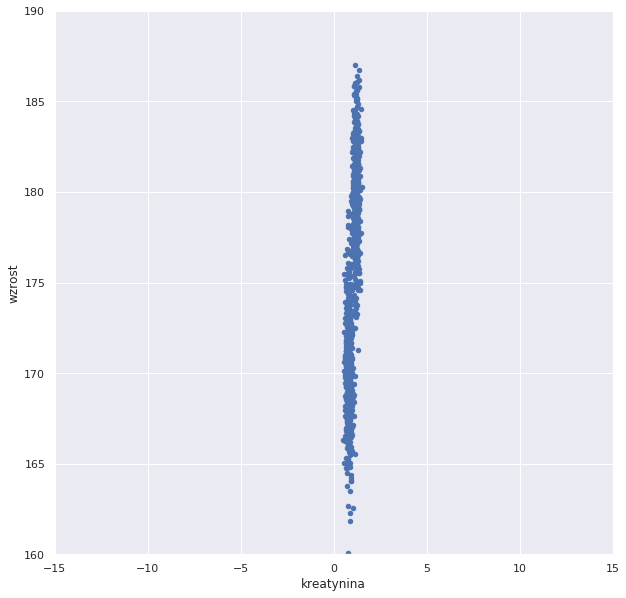

In [22]:
data_df.plot.scatter('kreatynina', 'wzrost', figsize=(10,10), xlim=(-15, 15), ylim=(160, 190));

In [23]:
data_df.mean()

wzrost        174.995829
kreatynina      0.996632
dtype: float64

In [24]:
data_df.std()

wzrost        5.715332
kreatynina    0.221626
dtype: float64

In [25]:
data_df_normalized = (data_df - data_df.mean()) / data_df.std()

In [26]:
data_df_normalized.shape

(1000, 2)

In [27]:
data_df_normalized.head()

,wzrost,kreatynina
0,-0.524069,-0.344636
1,-1.069715,-0.725058
2,-0.550465,-0.741099
3,-1.011595,-0.500708
4,-1.691997,-1.540865


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


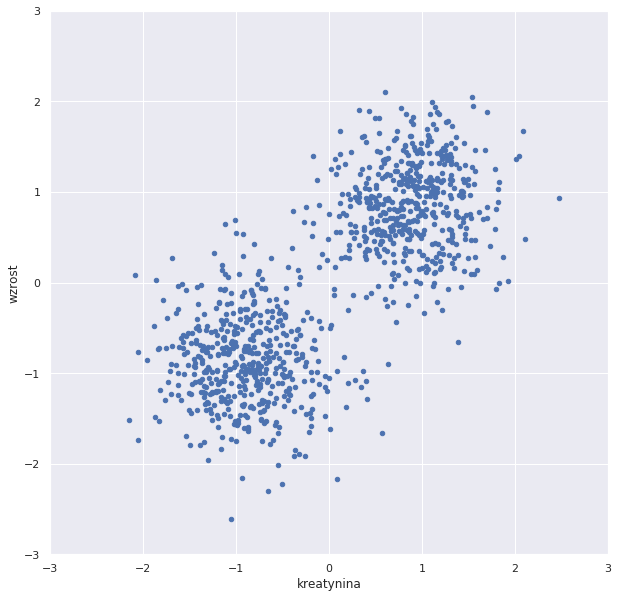

In [28]:
data_df_normalized.plot.scatter('kreatynina', 'wzrost', figsize=(10,10), xlim=(-3, 3), ylim=(-3, 3));

# Analiza głównych składowych (ang. PCA)

In [29]:
df = pd.read_csv("day.csv")
    
seasons = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
df['season'] = df['season'].map(seasons)
df = df[df.season.isin(['winter', 'summer'])]

In [30]:
X = df[["weathersit", "hum", "windspeed", "cnt", "registered", "casual"]]

In [31]:
X.shape

(369, 6)

In [32]:
X.head()

,weathersit,hum,windspeed,cnt,registered,casual
0,2,0.805833,0.160446,985,654,331
1,2,0.696087,0.248539,801,670,131
2,1,0.437273,0.248309,1349,1229,120
3,1,0.590435,0.160296,1562,1454,108
4,1,0.436957,0.186900,1600,1518,82


In [33]:
# normalizacja
X = (X - X.mean()) / X.std()

In [34]:
X.shape

(369, 6)

In [35]:
X.head()

,weathersit,hum,windspeed,cnt,registered,casual
0,1.241253,1.424287,-0.422454,-1.517640,-1.640783,-0.670350
1,1.241253,0.631483,0.723778,-1.605784,-1.631139,-0.970956
2,-0.675159,-1.238186,0.720785,-1.343268,-1.294188,-0.987489
3,-0.675159,-0.131746,-0.424406,-1.241231,-1.158564,-1.005525
4,-0.675159,-1.240469,-0.078245,-1.223028,-1.119986,-1.044604


In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2, random_state=12)

In [38]:
X_pca = pca.fit_transform(X)

In [39]:
X_pca.shape

(369, 2)

In [40]:
X_pca[:5,:]

array([[-2.31506523, -1.80689808],
       [-2.783935  , -0.81470689],
       [-2.00397859,  1.65638166],
       [-1.60238074,  0.45960078],
       [-1.66480368,  1.36940215]])

/home/patryk/Python-virtualenv/default/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


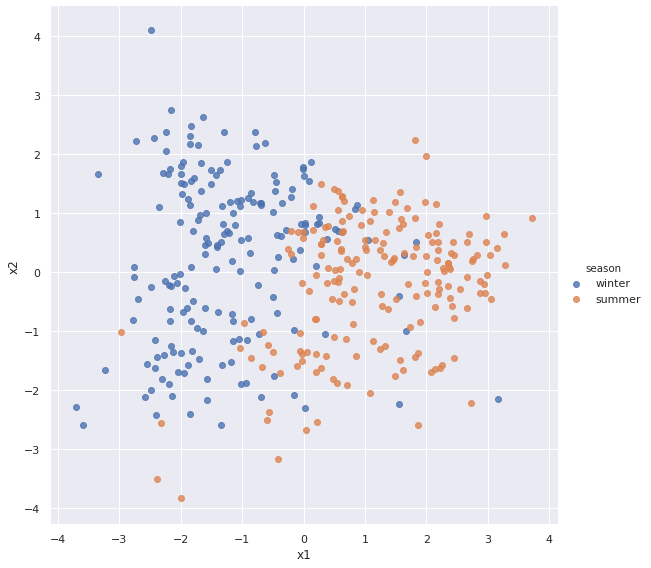

In [41]:
descr_feature = "season"
data = pd.DataFrame(np.column_stack((X_pca,df[descr_feature])), columns=["x1", "x2", descr_feature])
sns.lmplot(x="x1", y="x2", data=data, fit_reg=False, hue=descr_feature, size=8);